In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import seaborn as sns
from collections import Counter
from dateutil.relativedelta import relativedelta

In [81]:
pd.set_option('max_columns', None)

In [82]:
start = time.time()
df_train = pd.read_csv("raw_data/train_data.csv", parse_dates=[1])
df_test = pd.read_csv("raw_data/test_set_VU_DM.csv")
end = time.time()
print("Train set loaded in ", end - start, " seconds.")

Train set loaded in  55.01755714416504  seconds.


In [83]:
df_train.isnull().sum()

srch_id                              0
date_time                            0
site_id                              0
visitor_location_country_id          0
visitor_hist_starrating        4706481
visitor_hist_adr_usd           4705359
prop_country_id                      0
prop_id                              0
prop_starrating                      0
prop_review_score                 7364
prop_brand_bool                      0
prop_location_score1                 0
prop_location_score2           1090348
prop_log_historical_price            0
position                             0
price_usd                            0
promotion_flag                       0
srch_destination_id                  0
srch_length_of_stay                  0
srch_booking_window                  0
srch_adults_count                    0
srch_children_count                  0
srch_room_count                      0
srch_saturday_night_bool             0
srch_query_affinity_score      4640941
orig_destination_distance

In [84]:
df_train.head(3)

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,1,2.83,0.0438,4.95,27,104.77,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,1,2.20,0.0149,5.03,26,170.74,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,1,2.20,0.0245,4.92,21,179.80,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


## Dataset Statistics

In [85]:
df_train.shape

(4958347, 54)

In [86]:
#Number of properties
len(set(df_train.prop_id))

129113

In [87]:
#Number of searches
len(set(df_train.srch_id))

199795

In [88]:
#Number of search Destinations
len(set(df_train.srch_destination_id))

18127

In [89]:
#Number of search Destinations
len(set(df_train.site_id))

34

In [90]:
#visitor_location_country_id
len(set(df_train.prop_country_id))

172

In [91]:
#visitor_location_country_id
len(set(df_train.visitor_location_country_id))

210

In [92]:
df_train.price_usd.describe()

count    4.958347e+06
mean     2.542096e+02
std      1.600124e+04
min      0.000000e+00
25%      8.500000e+01
50%      1.220000e+02
75%      1.849600e+02
max      1.972633e+07
Name: price_usd, dtype: float64

In [93]:
df_train.date_time.describe()

<ipython-input-93-1ddeef1cf241>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_train.date_time.describe()


count                 4958347
unique                 198615
top       2012-11-02 14:04:51
freq                       95
first     2012-11-01 00:08:29
last      2013-06-30 23:58:24
Name: date_time, dtype: object

In [94]:
pos_clicked = df_train['position'].where(df_train['click_bool']==1)
pos_booked = df_train['position'].where(df_train['booking_bool']==1)

In [95]:
pos_clicked

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
4958342    NaN
4958343    NaN
4958344    NaN
4958345    1.0
4958346    NaN
Name: position, Length: 4958347, dtype: float64

<ipython-input-96-3c1dc8ca58a7>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:.1%}'.format(i) for i in np.linspace(0, 0.2, 9)])


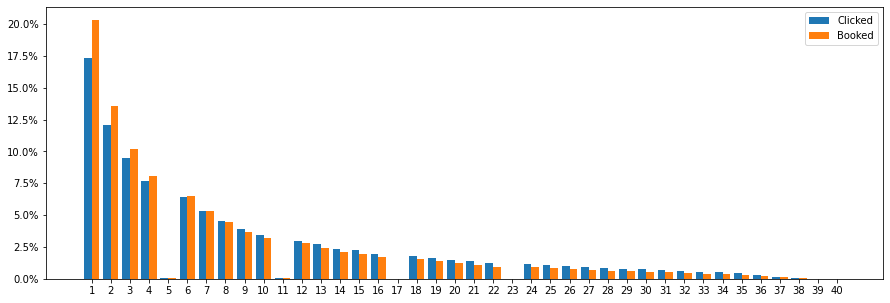

In [96]:
pos_clicked = pos_clicked.value_counts(normalize=True)
pos_clicked.index = pos_clicked.index.map(int)
pos_booked = pos_booked.value_counts(normalize=True)
pos_booked.index = pos_booked.index.map(int)

fig, ax = plt.subplots(figsize=[15,5])
#x = np.arange(1, 41)
x = np.arange(1, 41)
ax.bar(x-0.2, pos_clicked[x], width=0.4, label='Clicked')
ax.bar(x+0.2, pos_booked[x], width=0.4, label='Booked')
ax.set_xticks(x)
ax.set_yticklabels(['{:.1%}'.format(i) for i in np.linspace(0, 0.2, 9)])

plt.legend()
plt.show()

<ipython-input-97-408f68202d97>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['{:.1%}'.format(i) for i in np.linspace(0, 0.2, 9)])


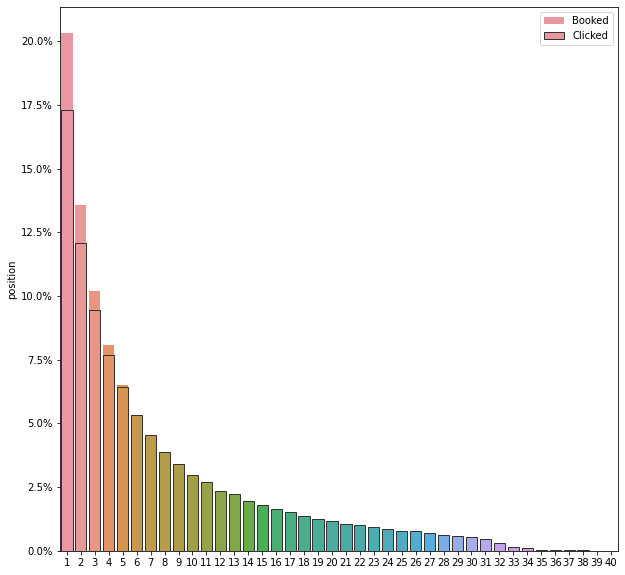

In [97]:
x = np.arange(1, 41)
fig, ax1 = plt.subplots(figsize=(10, 10))
#sns.set_theme(style="whitegrid")

sns.barplot(x=x, y=pos_booked, ax=ax1, label='Booked')
sns.barplot(x=x, y=pos_clicked, ax=ax1,edgecolor=".2", label='Clicked')
#ax.bar(x-0.2, pos_clicked[x], width=0.4, label='Clicked')
#ax.bar(x+0.2, pos_booked[x], width=0.4, label='Booked')
#ax1.set_xticks(x)
ax1.set_yticklabels(['{:.1%}'.format(i) for i in np.linspace(0, 0.2, 9)])
plt.legend()
plt.show()



D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


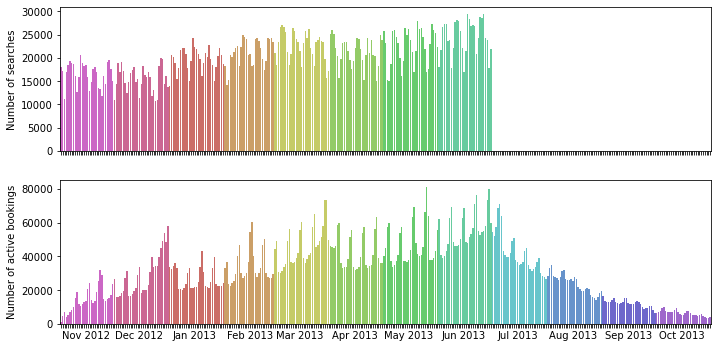

In [98]:

months = ['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

def name(x):
    if x[2] == 15:
        return '%s %d' % (months[x[1]], x[0])
    else:
        return ''

df2 = df_train

dates = [(a.year, a.month, a.day) for a in df2.date_time]
c = sorted(Counter(dates).items(), key=lambda kv: kv[0][0]*10000 + kv[0][1]*100 + kv[0][2])
datesort = [kv[0][0]*10000 + kv[0][1]*100 + kv[0][2] for kv in c]
names = [name(x) for x,y in c]
fig, axarr = plt.subplots(2, sharex=True, figsize=(1400/120, 700/120))
palette = sns.color_palette('hls', n_colors=12)
clrs = [palette[d[0][1]-1] for d in c]
bp1 = sns.barplot(datesort, [y for x,y in c], palette = clrs, ax=axarr[0], linewidth=0)
axarr[0].set_xticklabels(names)

startdates = [x+y for x,y in zip(df2.date_time, [relativedelta(days=x) for x in df2.srch_booking_window])]
staydates = zip(startdates, df2.srch_length_of_stay)
newdates = []
for staydate in staydates:
    for day in range(staydate[1]):
        newdates.append(staydate[0] + relativedelta(days=day))
newdates = [(a.year, a.month, a.day) for a in newdates if a.year < 2013 or (a.year == 2013 and a.month < 11)]
newc = sorted(Counter(newdates).items(), key=lambda kv: kv[0][0]*10000 + kv[0][1]*100 + kv[0][2])
newdatesort = [kv[0][0]*10000 + kv[0][1]*100 + kv[0][2] for kv in newc]
newnames = [name(x) for x,y in newc]
newclrs = [palette[d[0][1]-1] for d in newc]
bp2 = sns.barplot(newdatesort, [y for x,y in newc], palette = newclrs, ax=axarr[1], linewidth=0)
axarr[1].set_xticklabels(newnames)

bp1.set_ylabel("Number of searches")
bp2.set_ylabel("Number of active bookings")

plt.savefig("dateplot", dpi=1000)


In [99]:
df_train['srch_booking_window'].value_counts()

1      374949
0      276815
2      244186
3      206126
4      183088
        ...  
419         5
403         5
389         5
478         5
382         5
Name: srch_booking_window, Length: 429, dtype: int64

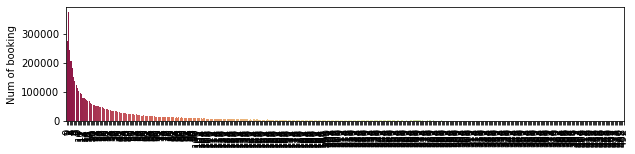

In [100]:
sorted_book_window = dict(df_train.srch_booking_window.value_counts().sort_values())
fig, ax = plt.subplots(figsize=(1200/120, 500/120))
perc =  [i for i in sorted_book_window.values()]
bp = sns.barplot(x=list(sorted_book_window.keys()),y=perc, palette='Spectral')
bp.set_ylabel("Num of booking")

for item in bp.get_xticklabels():
    item.set_rotation(90)
plt.subplots_adjust(bottom=0.5)

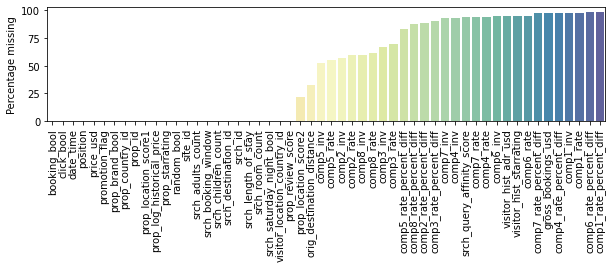

In [102]:
nrows = df_train.shape[0]
fig, ax = plt.subplots(figsize=(1200/120, 500/120))
d = df_train.isnull().sum().to_dict()
sorted_d = dict(sorted(d.items(), key=lambda kv: (kv[1],kv[0])))


perc =  [float(i*100/nrows) for i in sorted_d.values()]
bp = sns.barplot(x=list(sorted_d.keys()),y=perc, palette='Spectral')
bp.set_ylabel("Percentage missing")

for item in bp.get_xticklabels():
    item.set_rotation(90)

plt.subplots_adjust(bottom=0.5)
plt.savefig("barplot_missingvalues", dpi=400)